## Sentiment analysis with spaCy



In [1]:
# Set up spaCy
# Following: https://nicschrading.com/project/Intro-to-NLP-with-spaCy/
import spacy
# this English package is the default from the website but does not load as the default instructions
#spacy.load('en_core_web_sm') # This is not the same from tutorials. This works 
# From: https://stackoverflow.com/questions/47295316/importerror-no-module-named-spacy-en

# Here en_core_web_sm is the model 
# nlp is the main object or "the pipeline"
# When you call nlp on a text, spaCy will tokenize it and then call each component on the Doc, in order. 
# It then returns the processed Doc that you can work with.
model = "en_core_web_sm"
nlp = spacy.load(model)
# … the model’s meta.json tells spaCy to use the language "en" and the pipeline ["tagger", "parser", "ner"]. 
# spaCy will then initialize spacy.lang.en.English, and create each pipeline component and add 
# it to the processing pipeline. It’ll then load in the model’s data from its data directory 
# and return the modified Language class for you to use as the nlp object.



#this might not be necessary anymore 
#nlp.add_pipe(nlp.create_pipe('sentencizer')) # This comes from the error of not doing it also nlp is used by default instead of parser 

# Test Data
multiSentence = "There is an art, it says, or rather, a knack to flying." \
                 "The knack lies in learning how to throw yourself at the ground and miss." \
                 "In the beginning the Universe was created. This has made a lot of people "\
                 "very angry and been widely regarded as a bad move."

In [15]:
# all you have to do to parse text is this:
#note: the first time you run spaCy in a file it takes a little while to load up its modules
parsedData = nlp(multiSentence)

# Let's look at the tokens
# All you have to do is iterate through the parsedData
# Each token is an object with lots of different properties
# A property with an underscore at the end returns the string representation
# while a property without the underscore returns an index (int) into spaCy's vocabulary
# The probability estimate is based on counts from a 3 billion word
# corpus, smoothed using the Simple Good-Turing method.
for i, token in enumerate(parsedData):
    print("original:", token.orth, token.orth_)
    print("lowercased:", token.lower, token.lower_)
    print("lemma:", token.lemma, token.lemma_)
    print("shape:", token.shape, token.shape_)
    print("prefix:", token.prefix, token.prefix_)
    print("suffix:", token.suffix, token.suffix_)
    print("log probability:", token.prob)
    print("Brown cluster id:", token.cluster)
    print("----------------------------------------")
    if i > 1:
        break

original: 6090035477591592277 There
lowercased: 2112642640949226496 there
lemma: 2112642640949226496 there
shape: 16072095006890171862 Xxxxx
prefix: 5582244037879929967 T
suffix: 18139757808136603089 ere
log probability: -20.0
Brown cluster id: 0
----------------------------------------
original: 3411606890003347522 is
lowercased: 3411606890003347522 is
lemma: 10382539506755952630 be
shape: 4370460163704169311 xx
prefix: 5097672513440128799 i
suffix: 3411606890003347522 is
log probability: -20.0
Brown cluster id: 0
----------------------------------------
original: 15099054000809333061 an
lowercased: 15099054000809333061 an
lemma: 15099054000809333061 an
shape: 4370460163704169311 xx
prefix: 11901859001352538922 a
suffix: 15099054000809333061 an
log probability: -20.0
Brown cluster id: 0
----------------------------------------


In [16]:
# Let's look at the sentences
sents = []
# the "sents" property returns spans
# spans have indices into the original string
# where each index value represents a token
for span in parsedData.sents:
    # go from the start to the end of each span, returning each token in the sentence
    # combine each token using join()
    sent = ''.join(parsedData[i].string for i in range(span.start, span.end)).strip()
    sents.append(sent)

for sentence in sents:
    print(sentence)

There is an art, it says, or rather, a knack to flying.
The knack lies in learning how to throw yourself at the ground and miss.
In the beginning the Universe was created.
This has made a lot of people very angry and been widely regarded as a bad move.


In [17]:
# Let's look at the part of speech tags of the first sentence
for span in parsedData.sents:
    sent = [parsedData[i] for i in range(span.start, span.end)]
    break

for token in sent:
    print(token.orth_, token.pos_)

There PRON
is AUX
an DET
art NOUN
, PUNCT
it PRON
says VERB
, PUNCT
or CCONJ
rather ADV
, PUNCT
a DET
knack NOUN
to ADP
flying NOUN
. PUNCT


In [10]:
sent

[There, is, an, art, ,, it, says, ,, or, rather, ,, a, knack, to, flying, .]

In [18]:
# Let's look at the dependencies of this example:
example = "The boy with the spotted dog quickly ran after the firetruck."
parsedEx = parser(example)
# shown as: original token, dependency tag, head word, left dependents, right dependents
for token in parsedEx:
    print(token.orth_, token.dep_, token.head.orth_, [t.orth_ for t in token.lefts], [t.orth_ for t in token.rights])

The det boy [] []
boy nsubj ran ['The'] ['with']
with prep boy [] ['dog']
the det dog [] []
spotted amod dog [] []
dog pobj with ['the', 'spotted'] []
quickly advmod ran [] []
ran ROOT ran ['boy', 'quickly'] ['after', '.']
after prep ran [] ['firetruck']
the det firetruck [] []
firetruck pobj after ['the'] []
. punct ran [] []


In [12]:
messyData = "lol that is rly funny :) This is gr8 i rate it 8/8!!!"
parsedData = parser(messyData)
for token in parsedData:
    print(token.orth_, token.pos_, token.lemma_)
    
# it does pretty well! Note that it does fail on the token "gr8", 
# taking it as a verb rather than an adjective meaning "great"
# and "lol" probably isn't a noun...it's more like an interjection

lol INTJ lol
that DET that
is AUX be
rly ADV rly
funny ADJ funny
:) PUNCT :)
This DET this
is AUX be
gr8 ADJ gr8
i PRON i
rate VERB rate
it PRON -PRON-
8/8 NUM 8/8
! PUNCT !
! PUNCT !
! PUNCT !


## Textcat: classification of text using neural networks and IMDB data

From https://realpython.com/sentiment-analysis-python/#using-natural-language-processing-to-preprocess-and-clean-text-data

In [2]:

# Using Alexa reviews (high level tutorail)

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline


In [4]:
%%time

import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split


punctuations = string.punctuation

# It then returns the processed Doc that you can work with.
model = "en_core_web_sm"
nlp = spacy.load(model)

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# out own custom tokenizer 
# This is were we use spacy! 
# we provide the tokenizer method for scikit-learn
def spacy_tokenizer(sentence):    
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

# We create a class with a trasnform method
# the transform method will call our clean_text function 

#Here, we will create a custom predictors class wich inherits the 
# TransformerMixin class. This class overrides the transform, fit and 
# get_parrams methods. We’ll also create a clean_text() function that 
# removes spaces and converts text into lowercase.

# Mixins are a sort of class that is used to "mix in" extra properties 
# and methods into a class. This allows you to create classes in a 
# compositional style.
class predictors(TransformerMixin):
    def transform(self,X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y = None, **fit_params):
        return self
    def get_params(self, deep = True):
        return {}
    
def clean_text(text):
    return text.strip().lower()

CPU times: user 518 ms, sys: 27.1 ms, total: 546 ms
Wall time: 545 ms


## The datasets 
Here we use Amazon (Alexa) reviews but in principle we can use other datasets for training 



In [22]:


# Initialize our functions
# ngram_range: how many words to consider at once? Default 1 but it can do pairs for correlations 
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# scikit-learn TfidVectorizer: 
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

# Dataset (from tutorial)
df_amazon = pd.read_csv ("datasets/amazon_alexa.tsv", sep="\t")
df_amazon = pd.read_csv('datasets/imdb_train_25k_binary.csv', sep ='\t\t', engine = 'python')
#df_amazon.feedback.value_counts()

# Split Train / Test 
# For alexa 
#X = df_amazon['verified_reviews'] # the actual data 
# For IMDB
X = df_amazon['text_processed']
# THis is our supervised annotations 
#ylabels = df_amazon['feedback'] # positive or negative: given by the users 

#For IMDB
ylabels = df_amazon['score']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size = 0.3)

In [23]:
%%time
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression() 

# Then, we’ll create a pipeline with three components: a cleaner, a vectorizer, and a classifier. 
# The cleaner uses our predictors class object to clean and preprocess the text. The vectorizer 
# uses countvector objects to create the bag of words matrix for our text. 
# The classifier is an object that performs the logistic regression to classify the sentiments.

pipe = Pipeline( [('cleaner', predictors()),  # transform clean
                   ('vectorizer', bow_vector), # transform matrix frequency 
                   ('classifier', classifier)]) # Logistic regression 



pipe.fit(X_train, y_train)

CPU times: user 11min 22s, sys: 1min 1s, total: 12min 23s
Wall time: 12min 24s


/Users/alejandrog/anaconda3/envs/twitter/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x136b4c6a0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x135bbd280>)),
                ('classifier', LogisticRegression())])

In [24]:
%%time
from sklearn import metrics

predicted = pipe.predict(X_test)

CPU times: user 4min 39s, sys: 24.4 s, total: 5min 4s
Wall time: 5min 10s


In [25]:
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.8726666666666667
Logistic Regression Precision: 0.8602597402597403
Logistic Regression Recall: 0.8881737731295254


In [95]:
for test in X_test:
    print(test)

Fantastic product, absolutely love it!
I like the whole thing so far
It is very easy to use,I can now watch my favorite movies
 
Too soon, I'm still learning what I can do with it.
Love it.  It works great.  Alexa still has some problems  but it is getting better every day.  I'm not an expert but I think the sound quality is fine.  Not perfect but good.
Easy to set up and use.
It's ok. The speaker is pretty terrible. Google home is a better product.
I like the hands free operation vs the Tap. We use both for controlling smart plugs.
A great product for the price, works well!!
The screen response time is way better than I expected. Sound quality is good too, also it’s not so bright that I have to turn off the screen but it is an option.  I have a Dot in another room and which ever hears me better is the one that responds.
The speakers sound pretty good for being so small and setup is pretty easy.  I bought two and the reason I only rate it a 3 is I have followed the instructions for syn

In [26]:
sent_140 =pd.read_csv('datasets/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",
                     names=['score', 'ID', 'date', 'user', 'tweet'], header=None)
sent_140.columns

Index(['score', 'ID', 'date', 'user', 'tweet'], dtype='object')

In [27]:
sent_140.shape

(1600000, 5)

### Get data from twitter 

In [43]:
%%time
import datetime
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import pandas as pd

consumer_key = 'krqMjrz9CX47w1bAKmgUxgOvy'
consumer_secret = 'ck0N29BfNva235PmiVkLenOt2vDAE7veNly4YHKj17pgF5qThA'
#access_token = '1076160163722248193-Akv2lZjA6S1mqG9ClFgU3ABu74Dw7b'
#access_token_secret = '9VvNgdD8xQKqm9TZSE9dSTkmC9uthUWzwIexGVS2H7ozh'

# Log in Twitter API 
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tweets = []
sentiments = []

for tweet in tweepy.Cursor(api.user_timeline, screen_name='@jimcramer' ).items():
    tweets.append(tweet)
    
# 100 tweets almost immediate     
# 1000 tweets in 10 seconds 
# 3k tweets in 30 seconds (default when no )
len(tweets)

3247

In [44]:
%%time
# Extract the text from the list of tweets : 
texts = [tweet.text for tweet in tweets]
# Here we use the classifier from spaCy 
predicted = pipe.predict(pd.Series(texts))

In [45]:
# Analyze only tweets in the given date range using Text Blob 
startDate = datetime.datetime(2014, 6, 1, 0, 0, 0)
endDate =   datetime.datetime(2020, 12, 31, 0, 0, 0) # last day of 2020
def get_tweet_sentiment(tweet): 

    clean_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet) 
    return(analysis.sentiment.polarity)

parsed_tweets = []
sentiments = []
dates  = []
for tweet in tweets:
    if tweet.created_at < endDate and tweet.created_at > startDate: # only if they were created during the data range 
        parsed_tweets.append(tweet)
        sentiments.append( get_tweet_sentiment(tweet.text))
        dates.append(tweet.created_at.strftime("%m/%d/%Y"))
        #sentiments_sp.append( get_tweet_sentiment(tweet.text, clf_type = 2))         # This classifier works with spanish training 

        
sentiment_ts = pd.DataFrame({'Date': dates, 'sentiment': sentiments, 'spacy': predicted})

sentiment_ts['Date'] =pd.to_datetime(sentiment_ts.Date)
sentiment_ts.sort_values('Date') # This now sorts in date order 
sentiment_daily = sentiment_ts.groupby('Date').mean() # we take the average daily sentiment 

# 7 day window average 
sentiment_daily['7day_sentiment'] = sentiment_daily.sentiment.rolling(7).mean().shift(-3)
sentiment_daily.head()

,sentiment,spacy,7day_sentiment
Date,,,
2020-09-22,0.380342,0.615385,NaN
2020-09-23,0.151722,0.764706,NaN
2020-09-24,0.168493,0.695652,NaN
2020-09-25,0.047947,0.607843,0.200033
2020-09-26,0.214583,0.625000,0.168574


(96, 3)

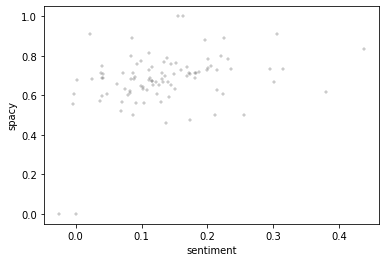

In [46]:
import seaborn as sns
sns.scatterplot(data = sentiment_daily, x = 'sentiment', y = 'spacy',
                s=10, color=".2", marker="+")
sentiment_daily.shape

## spaCy trained on Alexa data classifies everything as positive 
The Alexa dataset is biases to a total of 91% of positive reviews in the training. 
We need a more diverse dataset possible closer to twitter 